# Neural Networks Vs. Physics-Informed Neural networks

By David Ortiz and Rodrigo Salas, 2024 (ADD LICENSE!!!!!)

Read the seminal PINNs paper [here](https://www.sciencedirect.com/science/article/pii/S0021999118307125).

## Activity goals

By the end of this activity, you should be able to:

 - understand the need of numerical solution to complex models
 - understand the advantages of using Physics-Informed Neural Networks (PINNs) compared to common Neural Networks (NN)
 - train data-free and data-driven PINNs
 - solve other non-linear models

## Task overview

We will be coding a PINN from a scratch in PyTorch and using 

# Problem overview
We want to solve the mathematical problem related to the **oscillating pendulum**[(wiki)](https://en.wikipedia.org/wiki/Pendulum_(mechanics)):


| ![GIF](/home/ihealth/Dropbox/Trabajo/Proyectos/iHealth/Codes/ihealth-pinns-workshop/data/figures/Oscillating_pendulum.gif) | <img src="/home/ihealth/Dropbox/Trabajo/Proyectos/iHealth/Codes/ihealth-pinns-workshop/data/figures/Pendulum_gravity.svg" alt="Diagrama del proyecto" width="300"/> |
|-------------------------------------------|-------------------------------------------|
| Pendulum velocity and acceleration vectors  | Force diagram |


Assumptions:
- the rod is rigid and massless [(Homework)](https://en.wikipedia.org/wiki/Elastic_pendulum#:~:text=In%20physics%20and%20mathematics%2C%20in,%2Ddimensional%20spring%2Dmass%20system.)
- the weight is a point mass
- two dimensions [(Homework)](https://www.instagram.com/reel/CffUr64PjCx/?igsh=MWlmM2FscG9oYnp6bw%3D%3D)
- no air resistance [(Homework)](https://www.youtube.com/watch?v=erveOJD_qv4&ab_channel=Lettherebemath)
- gravitational field is uniform and the support does not move

We are interested in find the vertical angle $\theta(t) \in [0, 2\pi)$ such that:

$$
\frac{d^2\theta}{dt^2}+\frac{g}{l}\sin\theta=0,\quad\theta(0)=\theta_0,\quad t\in\mathbb{R}, 
$$

where $g\approx9.81m/s^2$, $l$ is the length of the rod and $t$ the temporal variable.

Review on differential equations:
- Why is this a non-linear differential equation?
- It is an ordinary differential equation (ODE) or a partial differential equation (PDE)?
- Which is the order, Which is the degree?

A usefull method is to convert the model to a coupled system of EDOs:

$$
\begin{align*}
\frac{d\theta}{dt} &= \omega, \quad \text{angular velocity}\\
\frac{d\omega}{dt} & = -\frac{g}{l}\sin\theta, \quad \text{angular acceleration}
\end{align*}
$$
    
## Analytical solution (no cheating!):


## Workflow overview:
1. For data-free excercise

    1.1. Run numerical solver
    1.2. Train common neural network and show solution
    1.3. Train PINN and show solution
    1.4. compare

2. For data-driven excercise

    2.1. Add noise to the numerical solution
    2.2. Train common neural network using noisy data
    2.3. Train PINN using noisy data
    2.4. compare

We begin by importing some usefull packages

In [4]:
# Import NumPy for numerical operations
import numpy as np
# Import PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.optim as optim
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
# Import a utility module for additional plotting functions
import utils
# Import the time module to time our training process
import time
# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")

### Data-free Excercise

#### Numerical solution
For the numerical solution we use the [Runge-Kutta of forth order](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) from `scipy`. We begin by defining the parameters for this example, the pendulum model, and the domain:

In [5]:
g = 9.81  # gravity acceleration (m/s^2)
L = 1.0   # Pendulum's rod length (m)
theta0 = np.pi / 4  # Initial condition (Position in rads)
omega0 = 0.0        # Initial angular speed (rad/s)

# We define the system of coupled ODEs
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Initial conditions
y0 = [theta0, omega0]

# Simulation time
t_span = (0, 10)  # from 0 to 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Points to be evaluated

Now, we solve the problem numerically using `scipy`

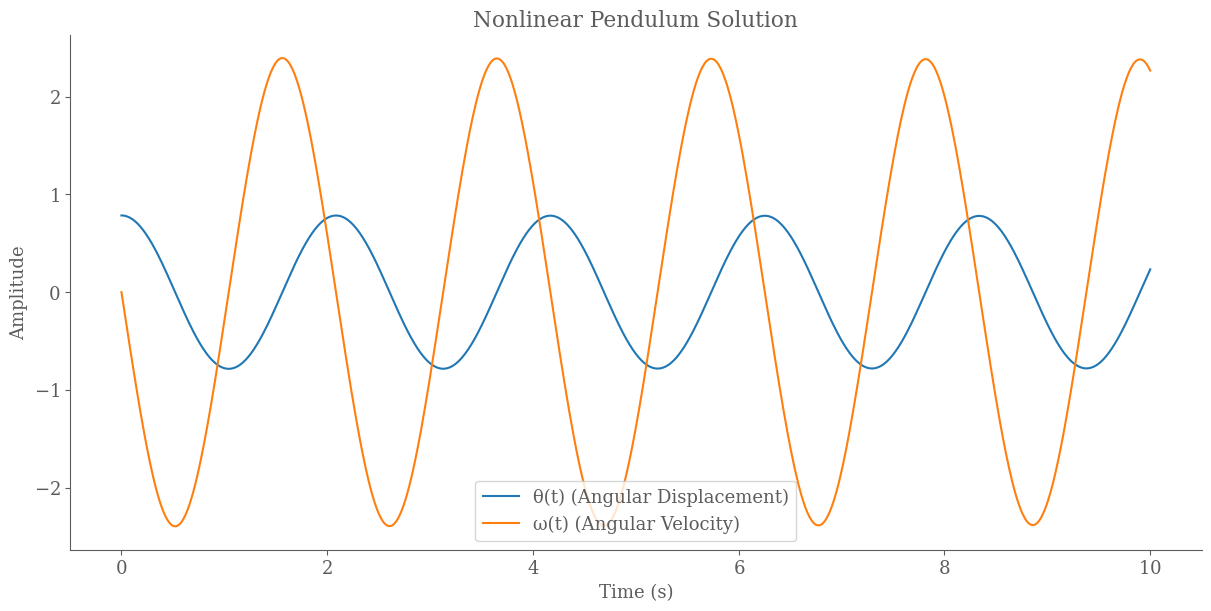

In [7]:
from scipy.integrate import solve_ivp

# Solve the initial value problem using Runge-Kutta 4th order
sol = solve_ivp(pendulum, t_span, y0, t_eval=t_eval, method='RK45')

# We extract the solutions
theta = sol.y[0]
omega = sol.y[1]
t = sol.t

# We graph the results
plt.figure(figsize=(12, 6))
plt.plot(t, theta, label='θ(t) (Angular Displacement)')
plt.plot(t, omega, label='ω(t) (Angular Velocity)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Nonlinear Pendulum Solution')
plt.grid(True)
plt.show()